In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("fraudTrain.csv")

In [3]:
train_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [4]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
train_data.shape

(1296675, 23)

In [11]:
test_data = pd.read_csv('fraudTest.csv')

In [12]:
test_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
train_data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [10]:
train_data['is_fraud'].isnull().sum()

0

In [13]:
train_data = train_data.drop(columns = ["trans_num","Unnamed: 0","trans_date_trans_time","cc_num","merchant","first","last","street","dob"], axis = 1)
test_data = test_data.drop(columns = ["trans_num","Unnamed: 0","trans_date_trans_time","cc_num","merchant","first","last","street","dob"], axis = 1)

In [14]:
train_data.head(3)

,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0


In [15]:
test_data.isnull().sum()

category      0
amt           0
gender        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [21]:
encoder = LabelEncoder()
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["city"] = encoder.fit_transform(train_data["city"])
train_data["state"] = encoder.fit_transform(train_data["state"])
train_data["job"] = encoder.fit_transform(train_data["job"])

In [22]:
train_data.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,9,41.96,1,216,45,24433,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0


In [27]:
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["city"] = encoder.fit_transform(test_data["city"])
test_data["state"] = encoder.fit_transform(test_data["state"])
test_data["job"] = encoder.fit_transform(test_data["job"])

In [28]:
test_data.head(3)


,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,10,2.86,1,157,39,29209,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,10,29.84,0,16,43,84002,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,5,41.28,0,61,33,11710,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0


<Axes: >

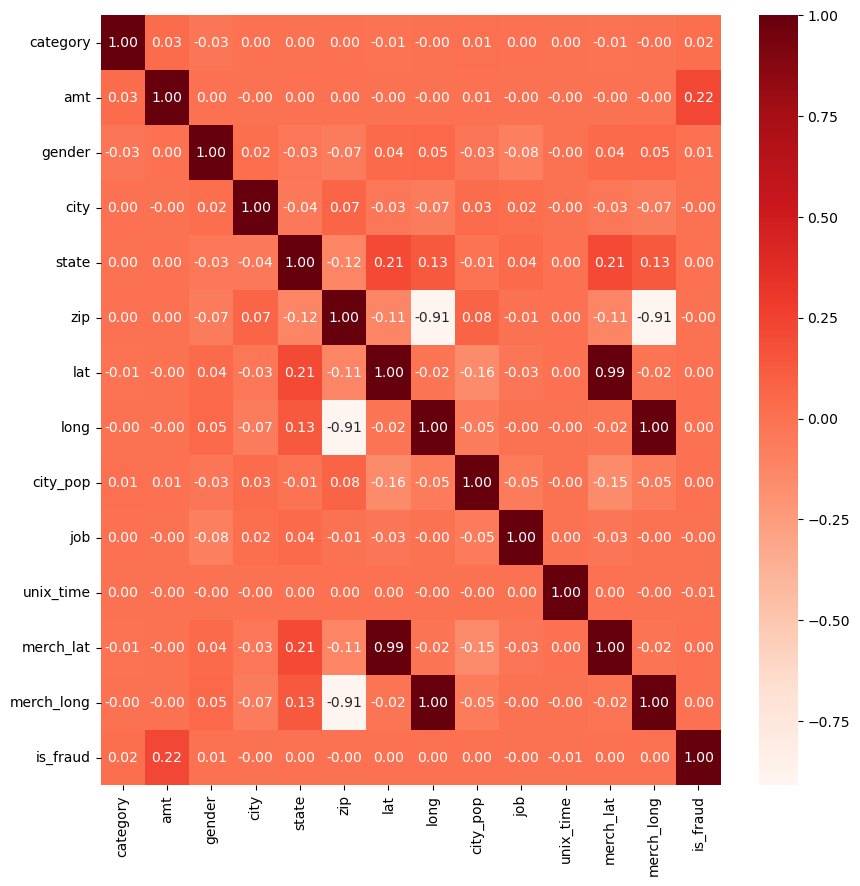

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(train_data.corr(), cmap = "Reds", annot = True, fmt = ".2f")

<Axes: xlabel='gender', ylabel='count'>

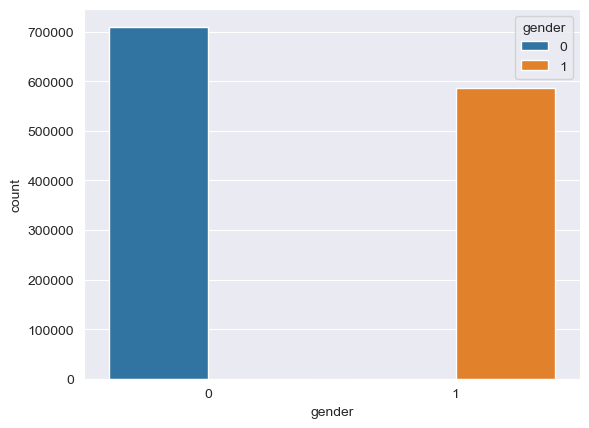

In [33]:
sns.set_style("darkgrid")
sns.countplot(data = train_data, x = "gender", hue = "gender")

In [34]:
y_train = train_data["is_fraud"]
x_train = train_data.drop(["is_fraud"], axis = 1)
y_test = test_data["is_fraud"]
x_test = test_data.drop(["is_fraud"], axis = 1)

In [35]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1296675, 13), (555719, 13), (1296675,), (555719,))

In [36]:
dtc = DecisionTreeClassifier(max_depth = 6)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train), dtc.score(x_test, y_test)

(0.9968920508222955, 0.997495136930715)

In [51]:
x_train

,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long
0,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315
1,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462
2,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481
3,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071
4,9,41.96,1,216,45,24433,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,330,44,84735,37.7175,-112.4777,258,215,1371816728,36.841266,-111.690765
1296671,1,51.70,1,813,20,21790,39.2667,-77.5101,100,360,1371816739,38.906881,-78.246528
1296672,1,105.93,1,346,32,88325,32.9396,-105.8189,899,308,1371816752,33.619513,-105.130529
1296673,1,74.90,1,471,41,57756,43.3526,-102.5411,1126,485,1371816816,42.788940,-103.241160


In [47]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(dtc, 'dtc.pkl')

# To load the model later
loaded_model = joblib.load('dtc.pkl')



In [55]:
y_pred = loaded_model.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


0.66164316966456


<Axes: >

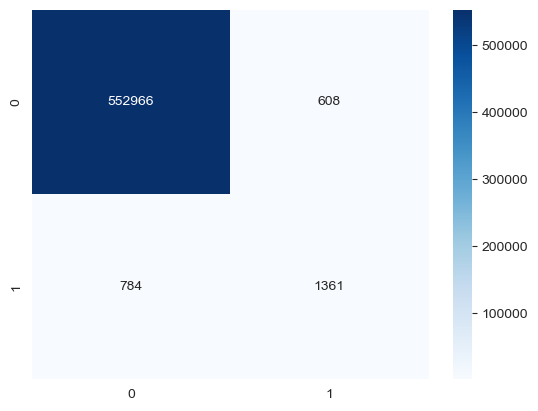

In [37]:
cf = confusion_matrix(y_test, dtc.predict(x_test))
print(f1_score(y_test, dtc.predict(x_test)))
sns.heatmap(data = cf, annot = True, fmt = "d", cmap = "Blues")

In [42]:
rfc = RandomForestClassifier(n_estimators = 20)
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train), rfc.score(x_test, y_test)

(0.999851157768909, 0.9973331845770974)

In [60]:
x_test.dtypes

category        int32
amt           float64
gender          int32
city            int32
state           int32
zip             int64
lat           float64
long          float64
city_pop        int64
job             int32
unix_time       int64
merch_lat     float64
merch_long    float64
dtype: object